# PCA Analysis

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import os

sys.path.append("..")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

from config import SCHEME_87, ROOT
os.chdir(ROOT)

/Users/songshgeo/opt/anaconda3/envs/WAInstitution_YRB_2021/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
merged_data = pd.read_csv("data/processed/merged_data.csv", index_col=0)
pca_data = merged_data.groupby('Province').mean().dropna(how='any')
pca_data.head()


,Year,IRR,Irrigated area: Total,Irrigated area: Rice,Irrigated area: Wheat,Irrigated area: Maize,Irrigated area: Vegetables and fruits,Irrigated area: Others,IND,Industrial gross value added (GVA): Total,...,gdp-2,gdp-3,gdp-avg,prec,temp,lrad,srad,wind,pres,shum
Province,,,,,,,,,,,,,,,,,,,,,
Anhui,1993.5,15.155402,2831.684121,766.595993,708.875647,164.182779,166.798901,1025.230801,4.077673,139.198514,...,1540.037158,1093.399313,5326.040687,1267.607028,288.939411,348.959436,152.732628,2.582257,99896.973735,0.009689
Beijing,1993.5,1.859436,288.476847,12.877286,74.549889,92.674583,65.250079,43.125010,1.094382,106.215251,...,970.098684,2323.170526,21721.148705,527.452063,283.733402,301.329822,164.978238,2.310648,97530.095647,0.005917
Chongqing,1993.5,1.583959,606.022218,144.239198,76.094047,89.655829,69.471862,226.561282,2.550031,94.403424,...,1022.746471,814.618824,7142.356840,1173.294189,288.098020,356.211078,126.162788,1.275329,93004.888500,0.009689
Fujian,1993.5,11.085994,921.166511,450.081815,26.273205,7.509374,242.857439,194.444677,3.830022,188.163823,...,1839.640789,1484.442632,10729.710303,1657.898779,291.069386,366.536199,155.783954,2.305355,95856.469794,0.011478
Gansu,1993.5,8.852844,954.063001,1.395892,334.297645,113.564454,102.404378,402.400631,1.326231,51.151269,...,503.017632,406.240000,4297.224713,288.056960,278.120395,266.378969,189.455216,2.479548,78813.959059,0.004257


In [3]:
from pca import pca
import yaml

YAML_PATH = "reports/n1987/87_all_wci.yaml"
with open(YAML_PATH, "r", encoding="utf-8") as file:
    params = yaml.load(file.read(), Loader=yaml.FullLoader)
    file.close()
    
features = params.get("parameters")['X_inputs']
features.remove("Province")
features.remove("Year")

[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [25] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [25] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


,Irrigated area: Rice,Irrigated area: Wheat,Irrigated area: Maize,Irrigated area: Vegetables and fruits,Irrigated area: Others,Industrial gross value added (GVA): Textile,Industrial gross value added (GVA): Papermaking,Industrial gross value added (GVA): Petrochemicals,Industrial gross value added (GVA): Metallurgy,Industrial gross value added (GVA): Mining,...,Industrial gross value added (GVA): Others,Urban population,Service GVA,Rural population,Livestock population,Total water use,WCI,Ratio of industrial water recycling,prec,temp
PC1,0.151126,0.168311,0.117377,0.240304,0.187893,0.217103,0.262441,0.245449,0.239982,0.109051,...,0.213944,0.242885,0.222212,0.244865,0.185948,0.214434,-0.051176,0.035212,0.085833,0.109508
PC2,0.263271,-0.298512,-0.397346,-0.062938,-0.280427,0.143410,0.031346,0.006947,0.048181,-0.369309,...,0.140739,-0.006895,0.152983,-0.064998,-0.143900,0.043038,-0.131315,-0.188383,0.363573,0.284281
PC3,0.298683,-0.026049,-0.022532,0.069328,0.085574,-0.264326,-0.046592,-0.213724,-0.074955,0.020024,...,-0.173638,0.006790,-0.255405,0.244727,0.373902,0.066316,-0.456887,-0.127822,0.273313,0.182700
PC4,0.142815,0.091382,-0.064651,0.035885,0.196411,0.118748,-0.019704,0.045690,0.029631,-0.101429,...,-0.057608,-0.087663,-0.073291,-0.049203,0.066417,0.334593,-0.110425,-0.673924,-0.283706,-0.419630


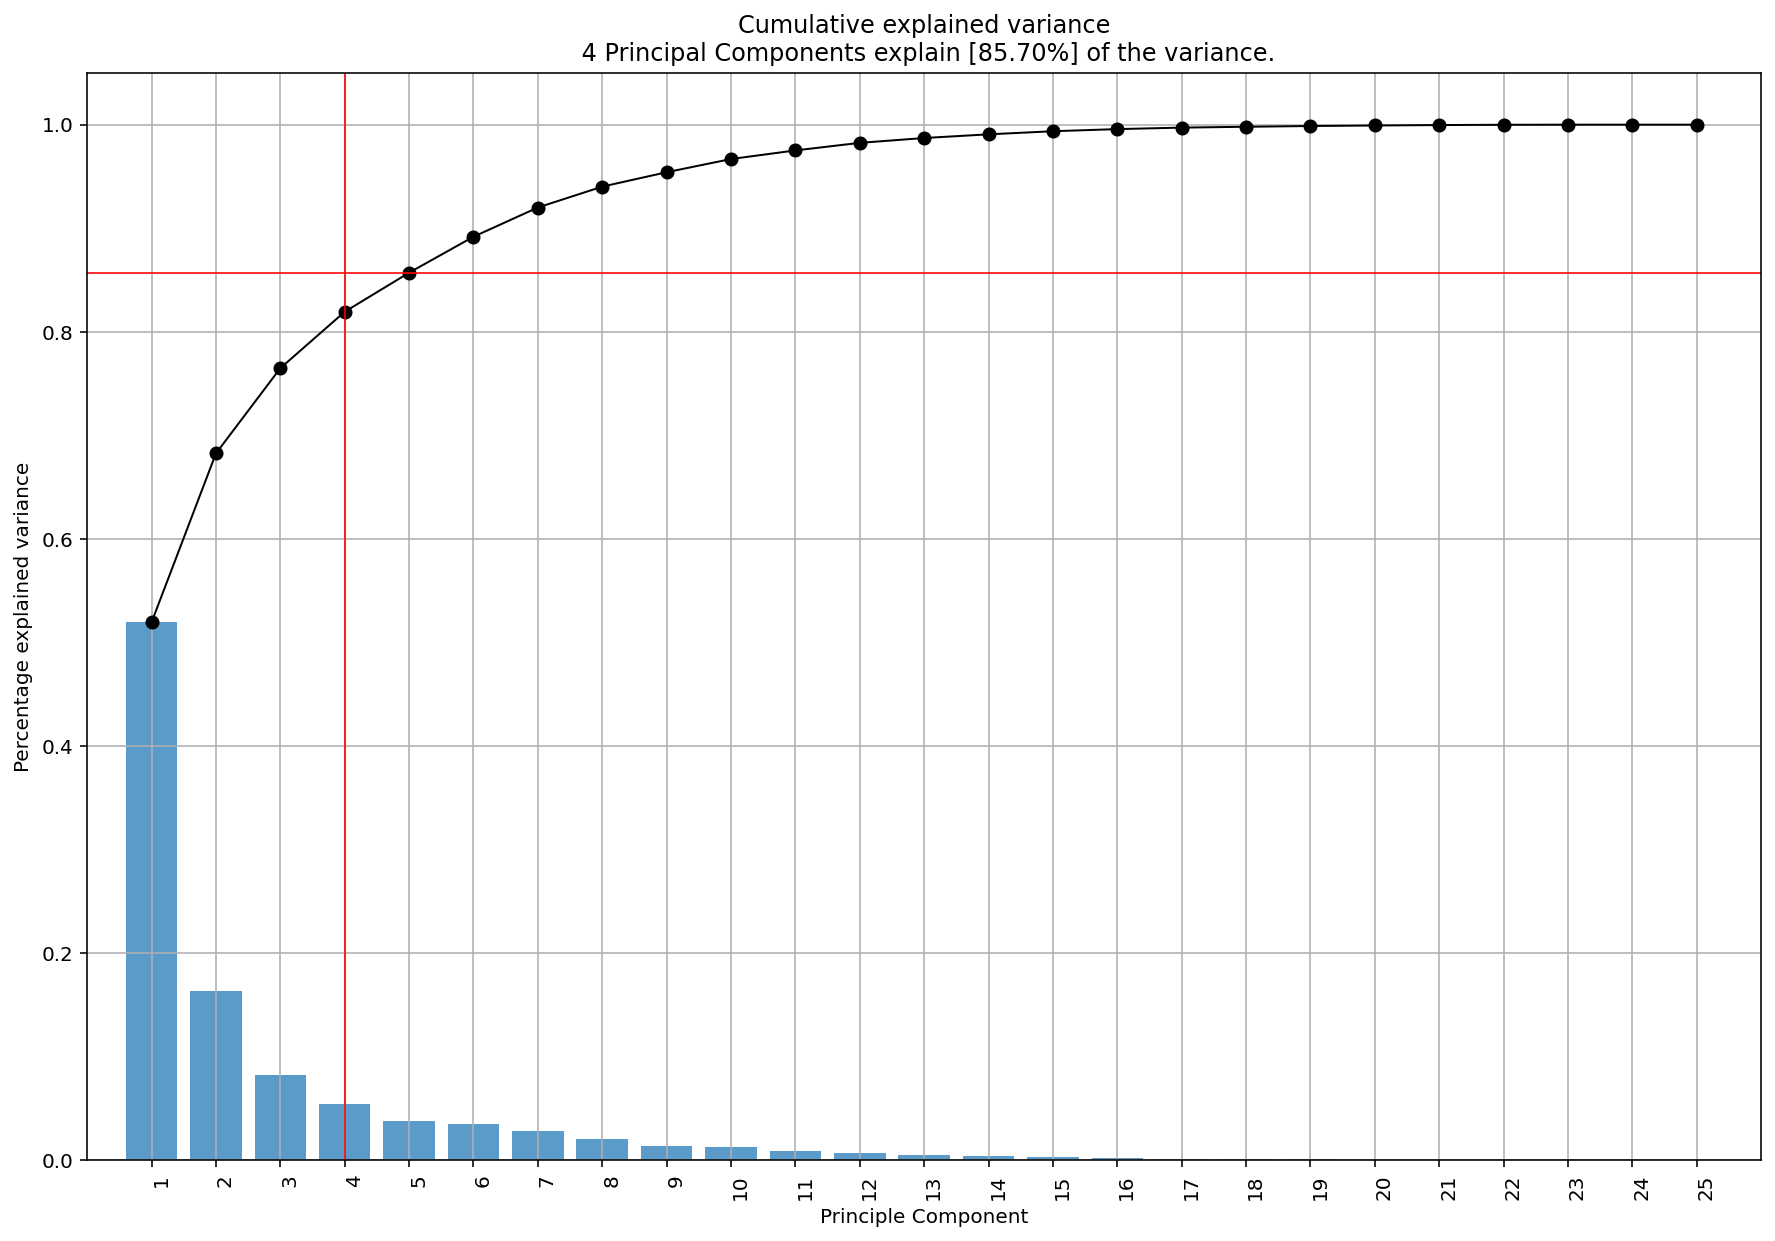

,PC,feature,loading,type
0,PC1,Industrial gross value added (GVA): Papermaking,0.262441,best
1,PC2,Irrigated area: Maize,-0.397346,best
2,PC3,WCI,-0.456887,best
3,PC4,Ratio of industrial water recycling,-0.673924,best
4,PC3,Irrigated area: Rice,0.298683,weak
5,PC2,Irrigated area: Wheat,-0.298512,weak
6,PC1,Irrigated area: Vegetables and fruits,0.240304,weak
7,PC2,Irrigated area: Others,-0.280427,weak
8,PC3,Industrial gross value added (GVA): Textile,-0.264326,weak
9,PC1,Industrial gross value added (GVA): Petrochemi...,0.245449,weak


<Figure size 432x288 with 0 Axes>

In [4]:
# Initialize to reduce the data up to the nubmer of componentes that explains 95% of the variance.
model = pca(n_components=0.80, normalize=True)
# Fit transform
results = model.fit_transform(pca_data[features].values, col_labels=pca_data[features].columns, row_labels=pca_data[features].index)
results['loadings']
fig, ax = model.plot()
results['topfeat']

In [5]:
transform = merged_data[features].dropna(how='any')
pca_data = model.transform(transform.values, col_labels=transform.columns, row_labels=transform.index)

pca_merged = pd.merge(left=merged_data, right=pca_data, left_index=True, right_index=True, how='left')
pca_merged.head()

[pca] >Normalizing input data per feature (zero mean and unit variance)..


,Province,Year,IRR,Irrigated area: Total,Irrigated area: Rice,Irrigated area: Wheat,Irrigated area: Maize,Irrigated area: Vegetables and fruits,Irrigated area: Others,IND,...,temp,lrad,srad,wind,pres,shum,PC1,PC2,PC3,PC4
0,Anhui,1975,17.645451,2276.640167,764.778552,548.032239,70.717044,35.632494,857.479838,1.086956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anhui,1976,18.522191,2482.553421,884.722141,575.515149,99.682037,38.498019,884.136074,1.150733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anhui,1977,17.787605,2335.400576,823.619187,542.212132,99.049454,38.323809,832.195993,1.201109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anhui,1978,18.422300,2400.548265,757.743029,586.096544,78.550030,43.855132,934.303530,1.646096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anhui,1979,19.352828,2507.857080,755.193431,671.153811,68.254446,42.843998,970.411394,1.307743,...,288.77164,343.6105,164.30405,2.557015,99895.77,0.009364,-2.249835,0.932923,2.518116,2.461679


[pca] >Plot PC1 vs PC2 with loadings.


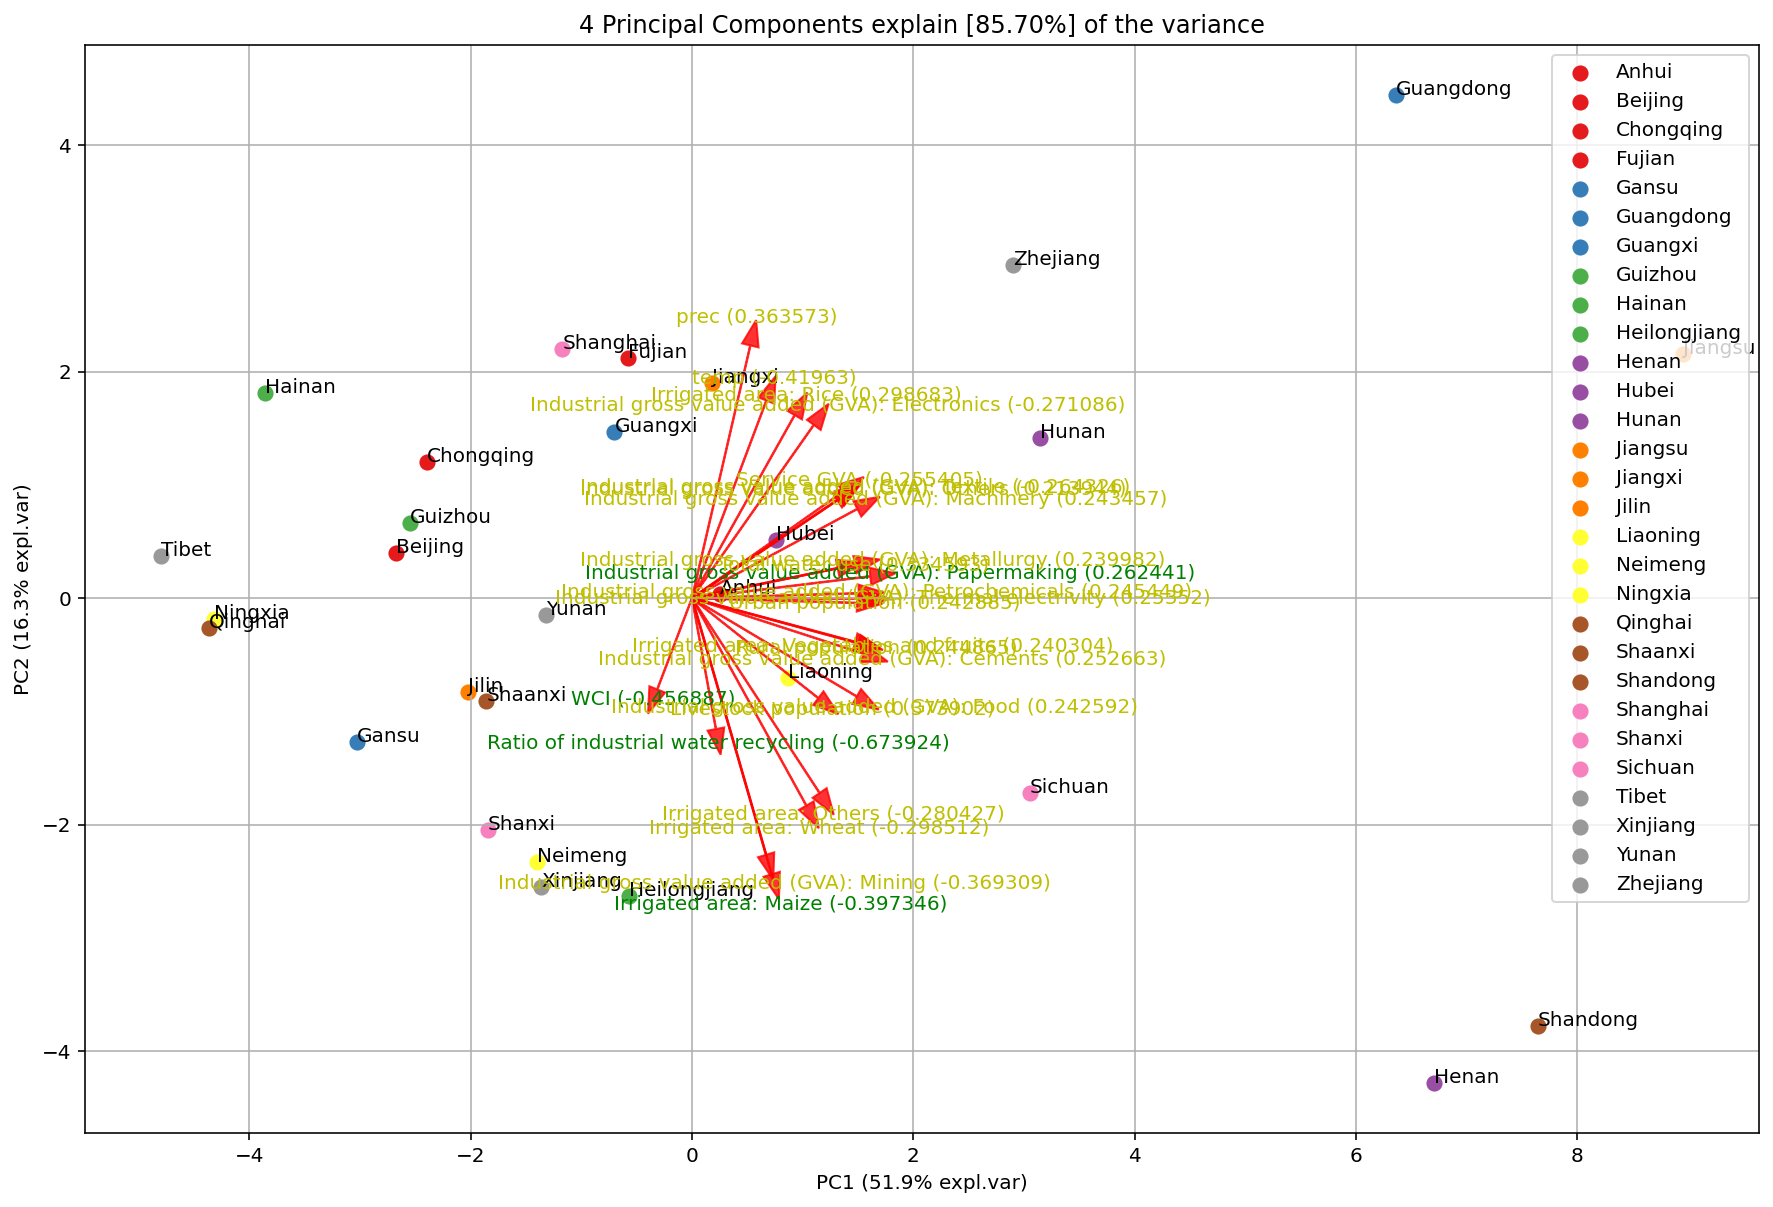

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [85.70%] of the variance'}, xlabel='PC1 (51.9% expl.var)', ylabel='PC2 (16.3% expl.var)'>)

In [6]:
model.biplot()